# Exploración profunda del dataset clínico
Este cuaderno realiza un análisis exhaustivo del dataset proporcionado.

In [49]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Carga de datos
df = pd.read_csv('../DataWarehouse/data.csv')
df.head()

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,preservation_method.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples,tipo_cancer_TCGA,tipo_cancer_general
0,TCGA-B0-5695-01A,fb9bafa5-7133-4955-8156-4eb6763dc8e1,Adenomas and Adenocarcinomas,fb9bafa5-7133-4955-8156-4eb6763dc8e1,TCGA-B0-5695,Kidney,Not Reported,white,female,not hispanic or latino,...,1,Primary,86e4862c-7405-40b5-b73f-be0c6c52ea6d,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
1,TCGA-BP-4807-01A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,1,Primary,26307437-2f30-4647-81ac-f6bae5be6113,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
2,TCGA-BP-4807-11A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,11,Not Applicable,6a8ad307-fada-432d-a223-8d9780c4eccc,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón
3,TCGA-BP-4995-01A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,1,Primary,5cd539b8-90bf-4465-826f-73269ea2e802,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
4,TCGA-BP-4995-11A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,11,Not Applicable,8b6e49fe-5470-476d-9695-0caee2896d66,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón


## Información general del dataset

In [51]:
import numpy as np

# Lista de valores no informativos a reemplazar por NaN
valores_no_informativos = [
    'Not Reported', 'not reported',
    'Unknown', 'unknown',
    '[not available]', '[Not Available]',
    '[Unknown]', '[unknown]'
]

# Reemplazar en todo el DataFrame
df.replace(valores_no_informativos, np.nan, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12797 entries, 0 to 12796
Data columns (total 65 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   sample                                                     12797 non-null  object 
 1   id                                                         12797 non-null  object 
 2   disease_type                                               12797 non-null  object 
 3   case_id                                                    12797 non-null  object 
 4   submitter_id                                               12797 non-null  object 
 5   primary_site                                               12796 non-null  object 
 6   alcohol_history.exposures                                  964 non-null    object 
 7   race.demographic                                           11674 non-null  object 
 8   gender

## Valores nulos

Missigno hace una visualización gráfica de los valores faltantes en nuestro Data. Es una grilla visual donde:

- Cada columna representa una columna del DataFrame.
- Cada línea horizontal representa una fila del dataset.
- Los bloques blancos indican valores faltantes (NaN).
- Los bloques oscuros indican valores no nulos (datos presentes).
- La barra lateral muestra cuántos valores faltan por fila.

Nos permite ver si los valores faltan de forma aleatoria o estructurada, ayuda a detectar patrones (por ejemplo, si varias columnas fallan juntas) y es más visual e intuitivo que imprimir le número de valores nulos por columna.

Matriz de valores nulos:

<Axes: >

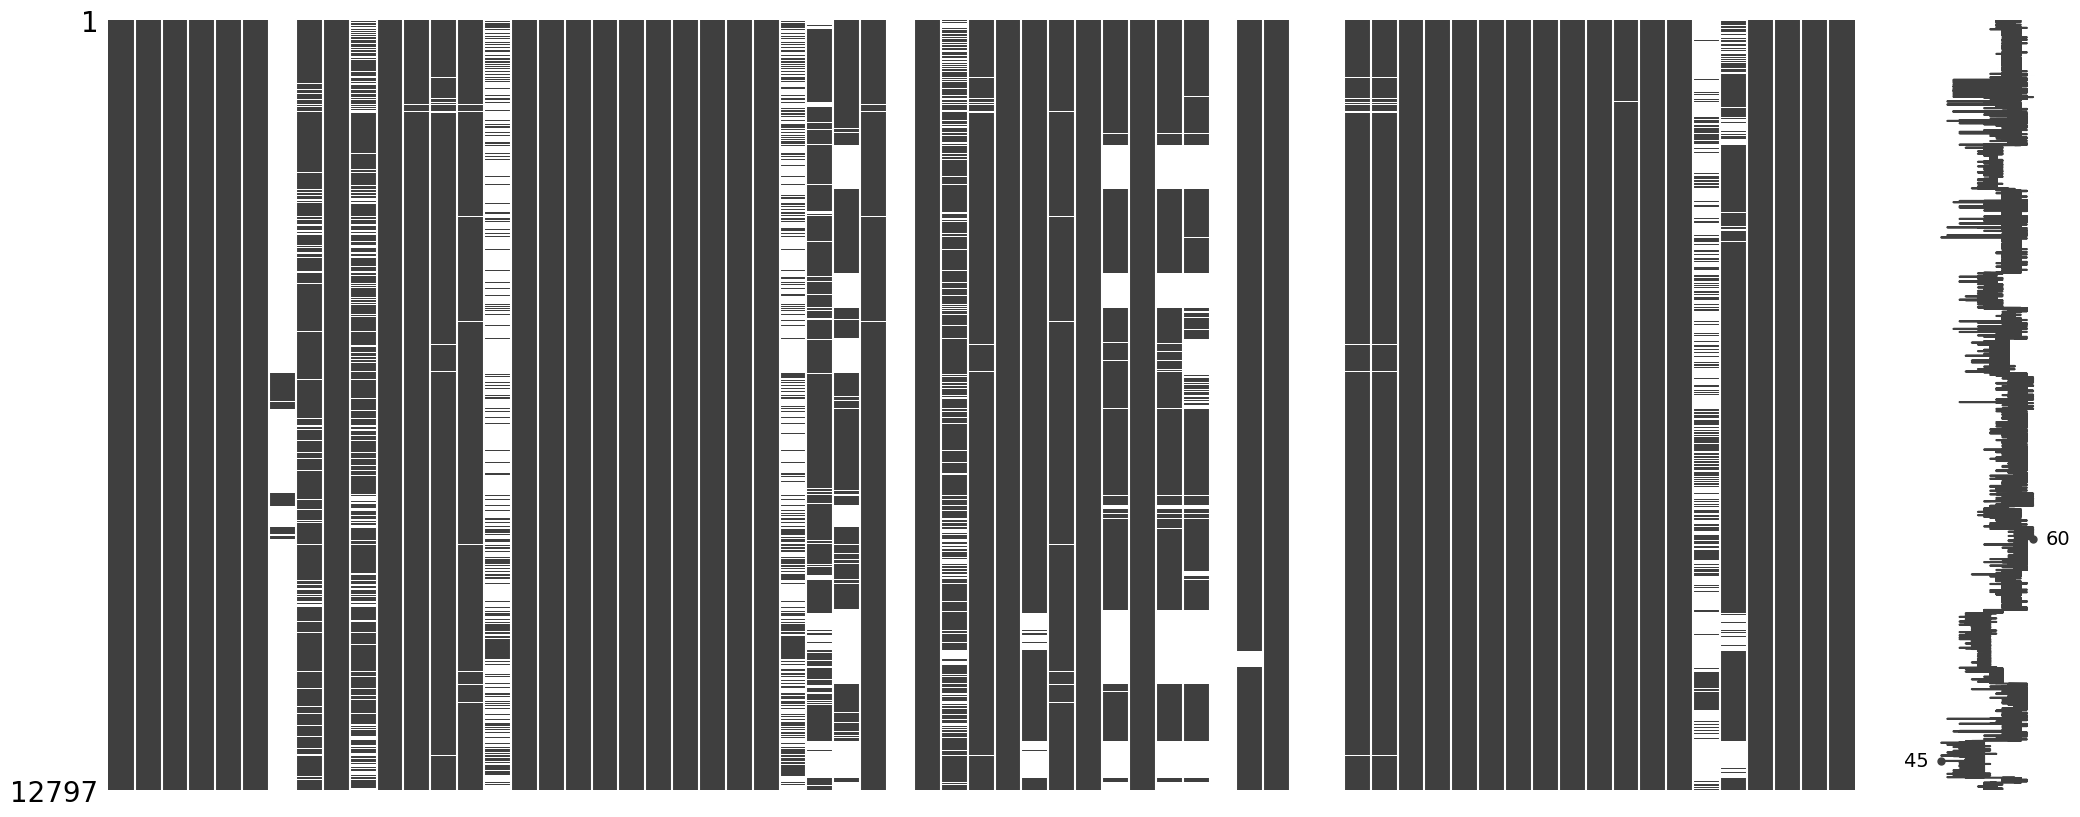

In [53]:
msno.matrix(df)

- Claramente se ve que hay columnas con valores completos (barras negras) y otras con una cantidad notable de valores faltantes.
- Algunas columnas presentan patrones de nulos (es decir, varias filas tienen nulos en las mismas columnas), lo cual sugiere que los datos faltantes no son aleatorios, sino posiblemente condicionales (por ejemplo, en función del tipo de cáncer).
- En conjunto, no parece que la mayoría del dataset esté "perdido", pero hay variables específicas que convendría imputar o eliminar.

Variables destacadas:
- year_of_death.demographic: Los registros que están vacíos es porque están vivos.
- days_to_death.demographic: Días que han pasado entre la fecha de índice y la fecha de muerte.
- ajcc_pathologic_m.diagnoses: Presencia de metástasis.
- ajcc_pathologic_stage.diagnoses: Estado general del tumor.
- ajcc_pathologic_n.diagnoses: Grado de afectación a los ganglios linfáticos.
- ajcc_pathologic_t.diagnoses: Tamaño y extensión del tumor.
- days_to_last_follow_up.diagnoses: Días desde el diagnóstico inicial hasta el último momento en que se tuvo contacto con el paciente (seguimiento clínico).

Tiene sentido porque en cada tipo de cáncer hay algunas columnas que faltan.

---

Correlaciones entre valores nulos:

<Axes: >

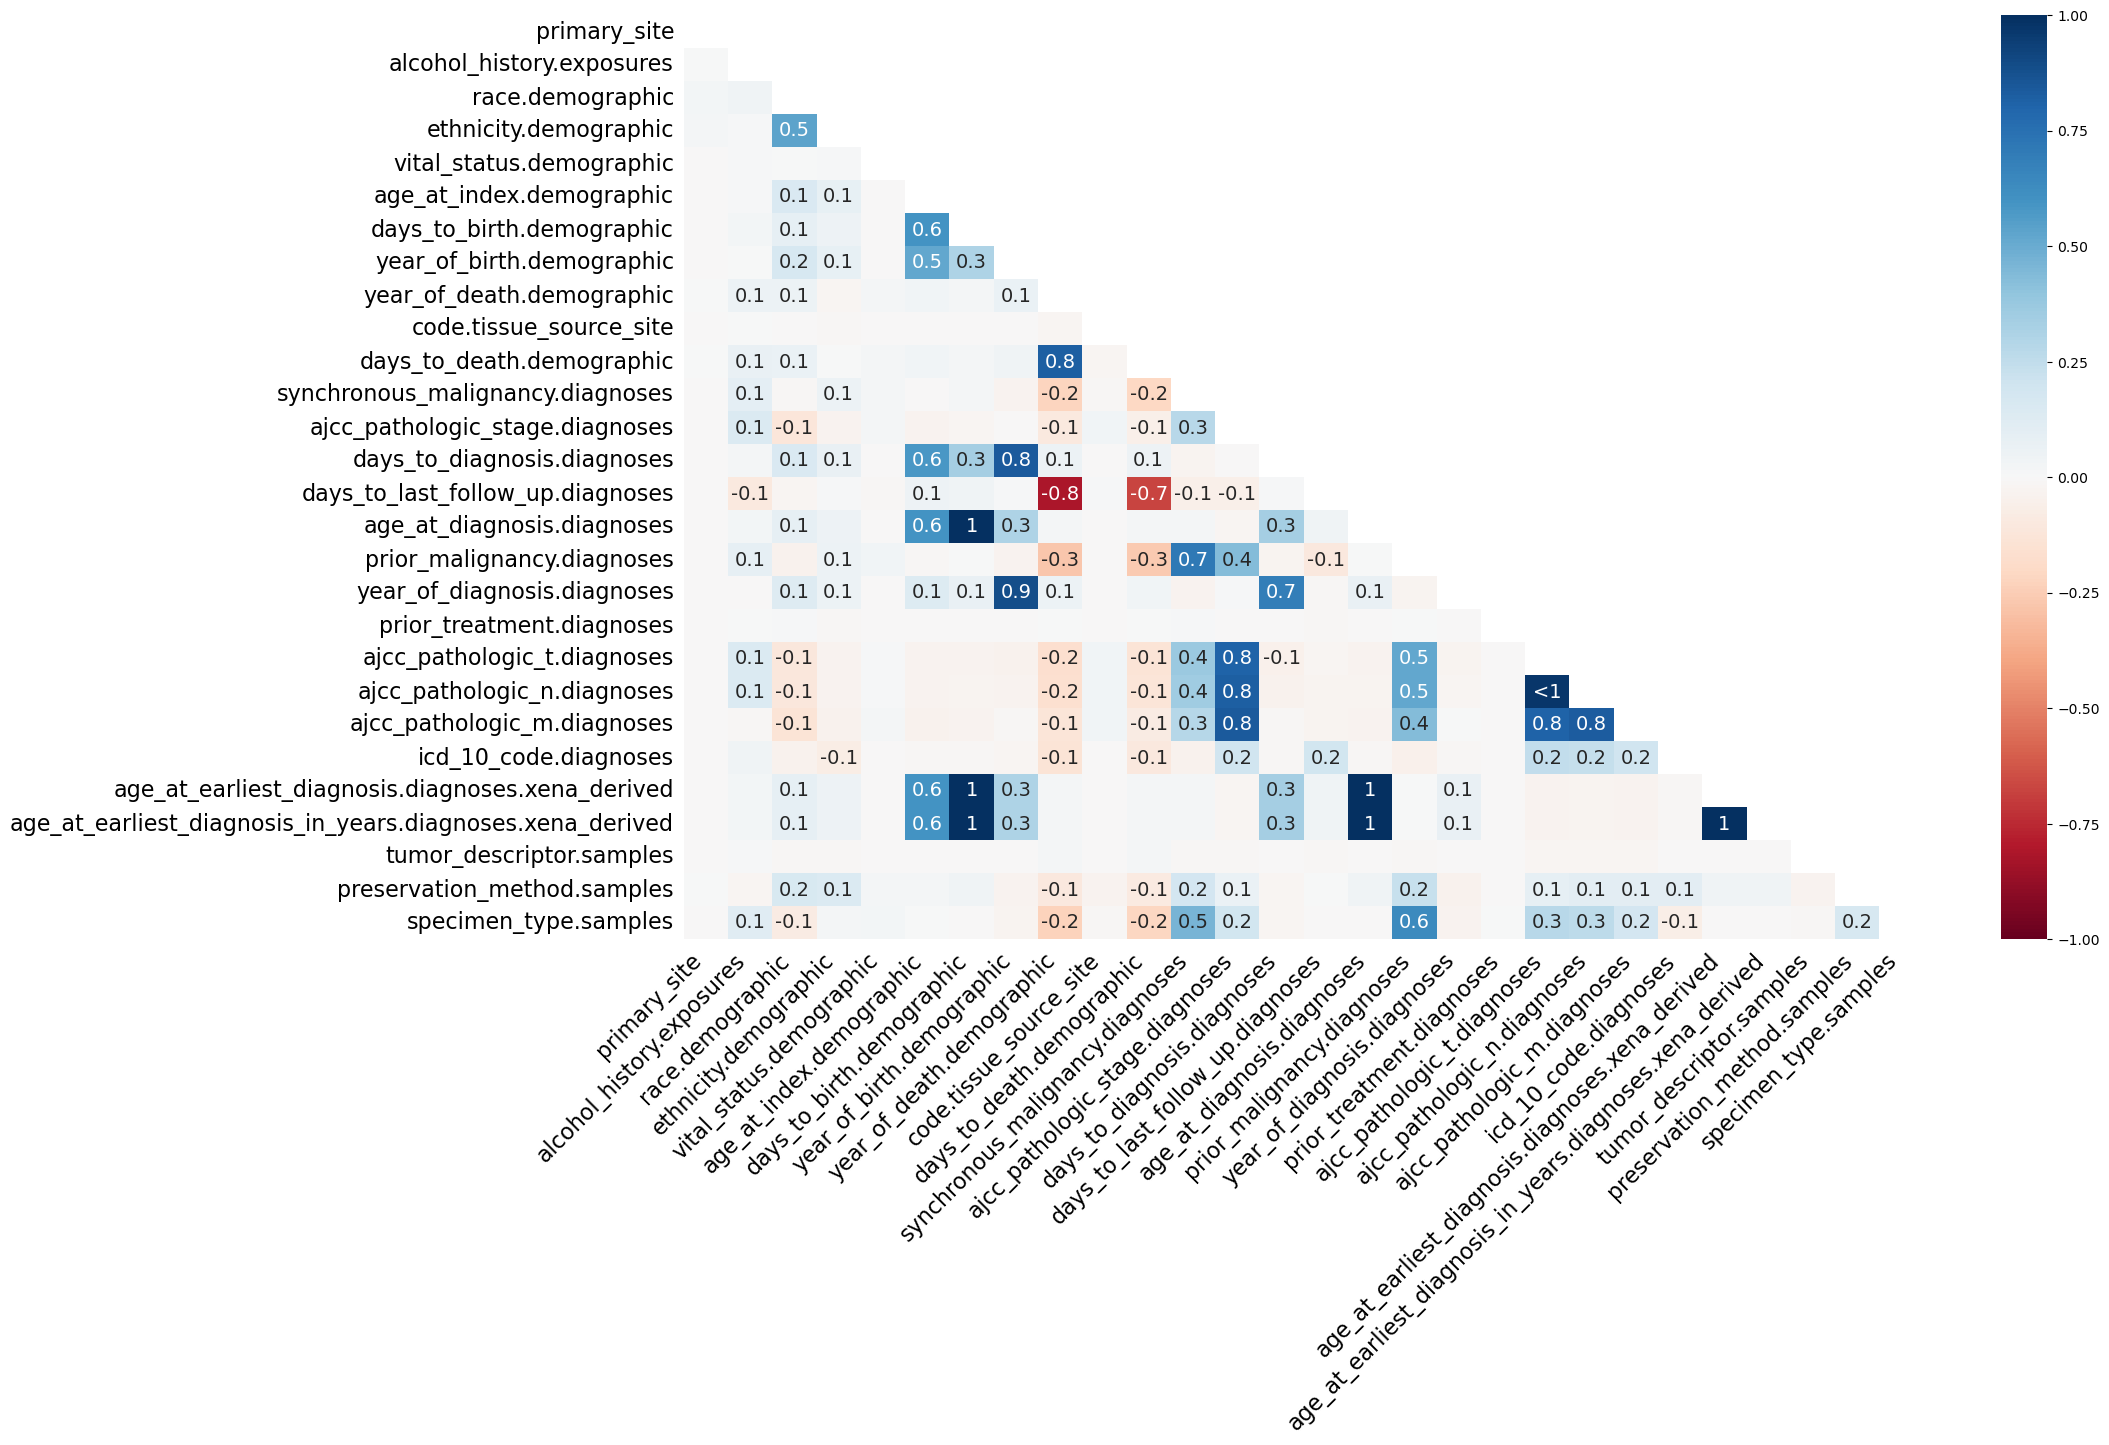

In [54]:
msno.heatmap(df)

### Análisis de Correlación de valores faltantes

#### Variables con Correlación Fuerte (> 0.8 o < -0.8)

`days_to_diagnosis` vs `age_at_diagnosis`: **0.8**
  - Cuanto más tiempo desde el nacimiento hasta el diagnóstico, mayor edad.
  - Podríamos usar solo una.


`days_to_diagnosis` vs `days_to_last_follow_up`: **-0.8**
  - Interesante correlación negativa: diagnóstico más temprano se asocia con mayor tiempo de seguimiento.
  - Podría tener implicaciones clínicas importantes en supervivencia o pronóstico.


`ajcc_pathologic_t`, `n`, `m`: **correlación entre sí ~0.8**
  - Representan el sistema TNM (Tamaño, Ganglios, Metástasis).
  - Tiene sentido que estén correlacionadas. Se recomienda mantenerlas juntas.
  

`age_at_diagnosis` vs `age_at_earliest_diagnosis` y `age_at_earliest_diagnosis_in_years`: **correlación perfecta**
  - Redundancia. Podemos conservar solo una de estas tres variables derivadas.


#### Otras observaciones relevantes

`year_of_diagnosis` vs `year_of_birth`: **~0.7**
  - Relación temporal esperada: los más jóvenes suelen diagnosticarse más recientemente.

`days_to_last_follow_up` muestra correlaciones negativas con varias variables:
  - Sugerencia de que **puede actuar como variable proxy de seguimiento/supervivencia**.
  - Útil en análisis censurados si se combina con `days_to_death` y `vital_status`.


#### Resumen posibles cambios

| Variable | Acción recomendada |
|----------|--------------------|
| `age_at_earliest_diagnosis`, `age_at_earliest_diagnosis_in_years` | Conservar solo una |
| `days_to_last_follow_up` | Usar como proxy de seguimiento |
| `days_to_diagnosis`, `age_at_diagnosis` | Posible simplificación usando solo una |
| `ajcc_pathologic_t/n/m` | Mantener como grupo para análisis de estadio clínico |

Agrupación de columnas con valores similares nulos. Es una visualización tipo “árbol” que agrupa columnas basándose en cómo coinciden sus valores nulos. Si dos columnas tienden a tener nulos en los mismos registros, se agrupan juntas:

<Axes: >

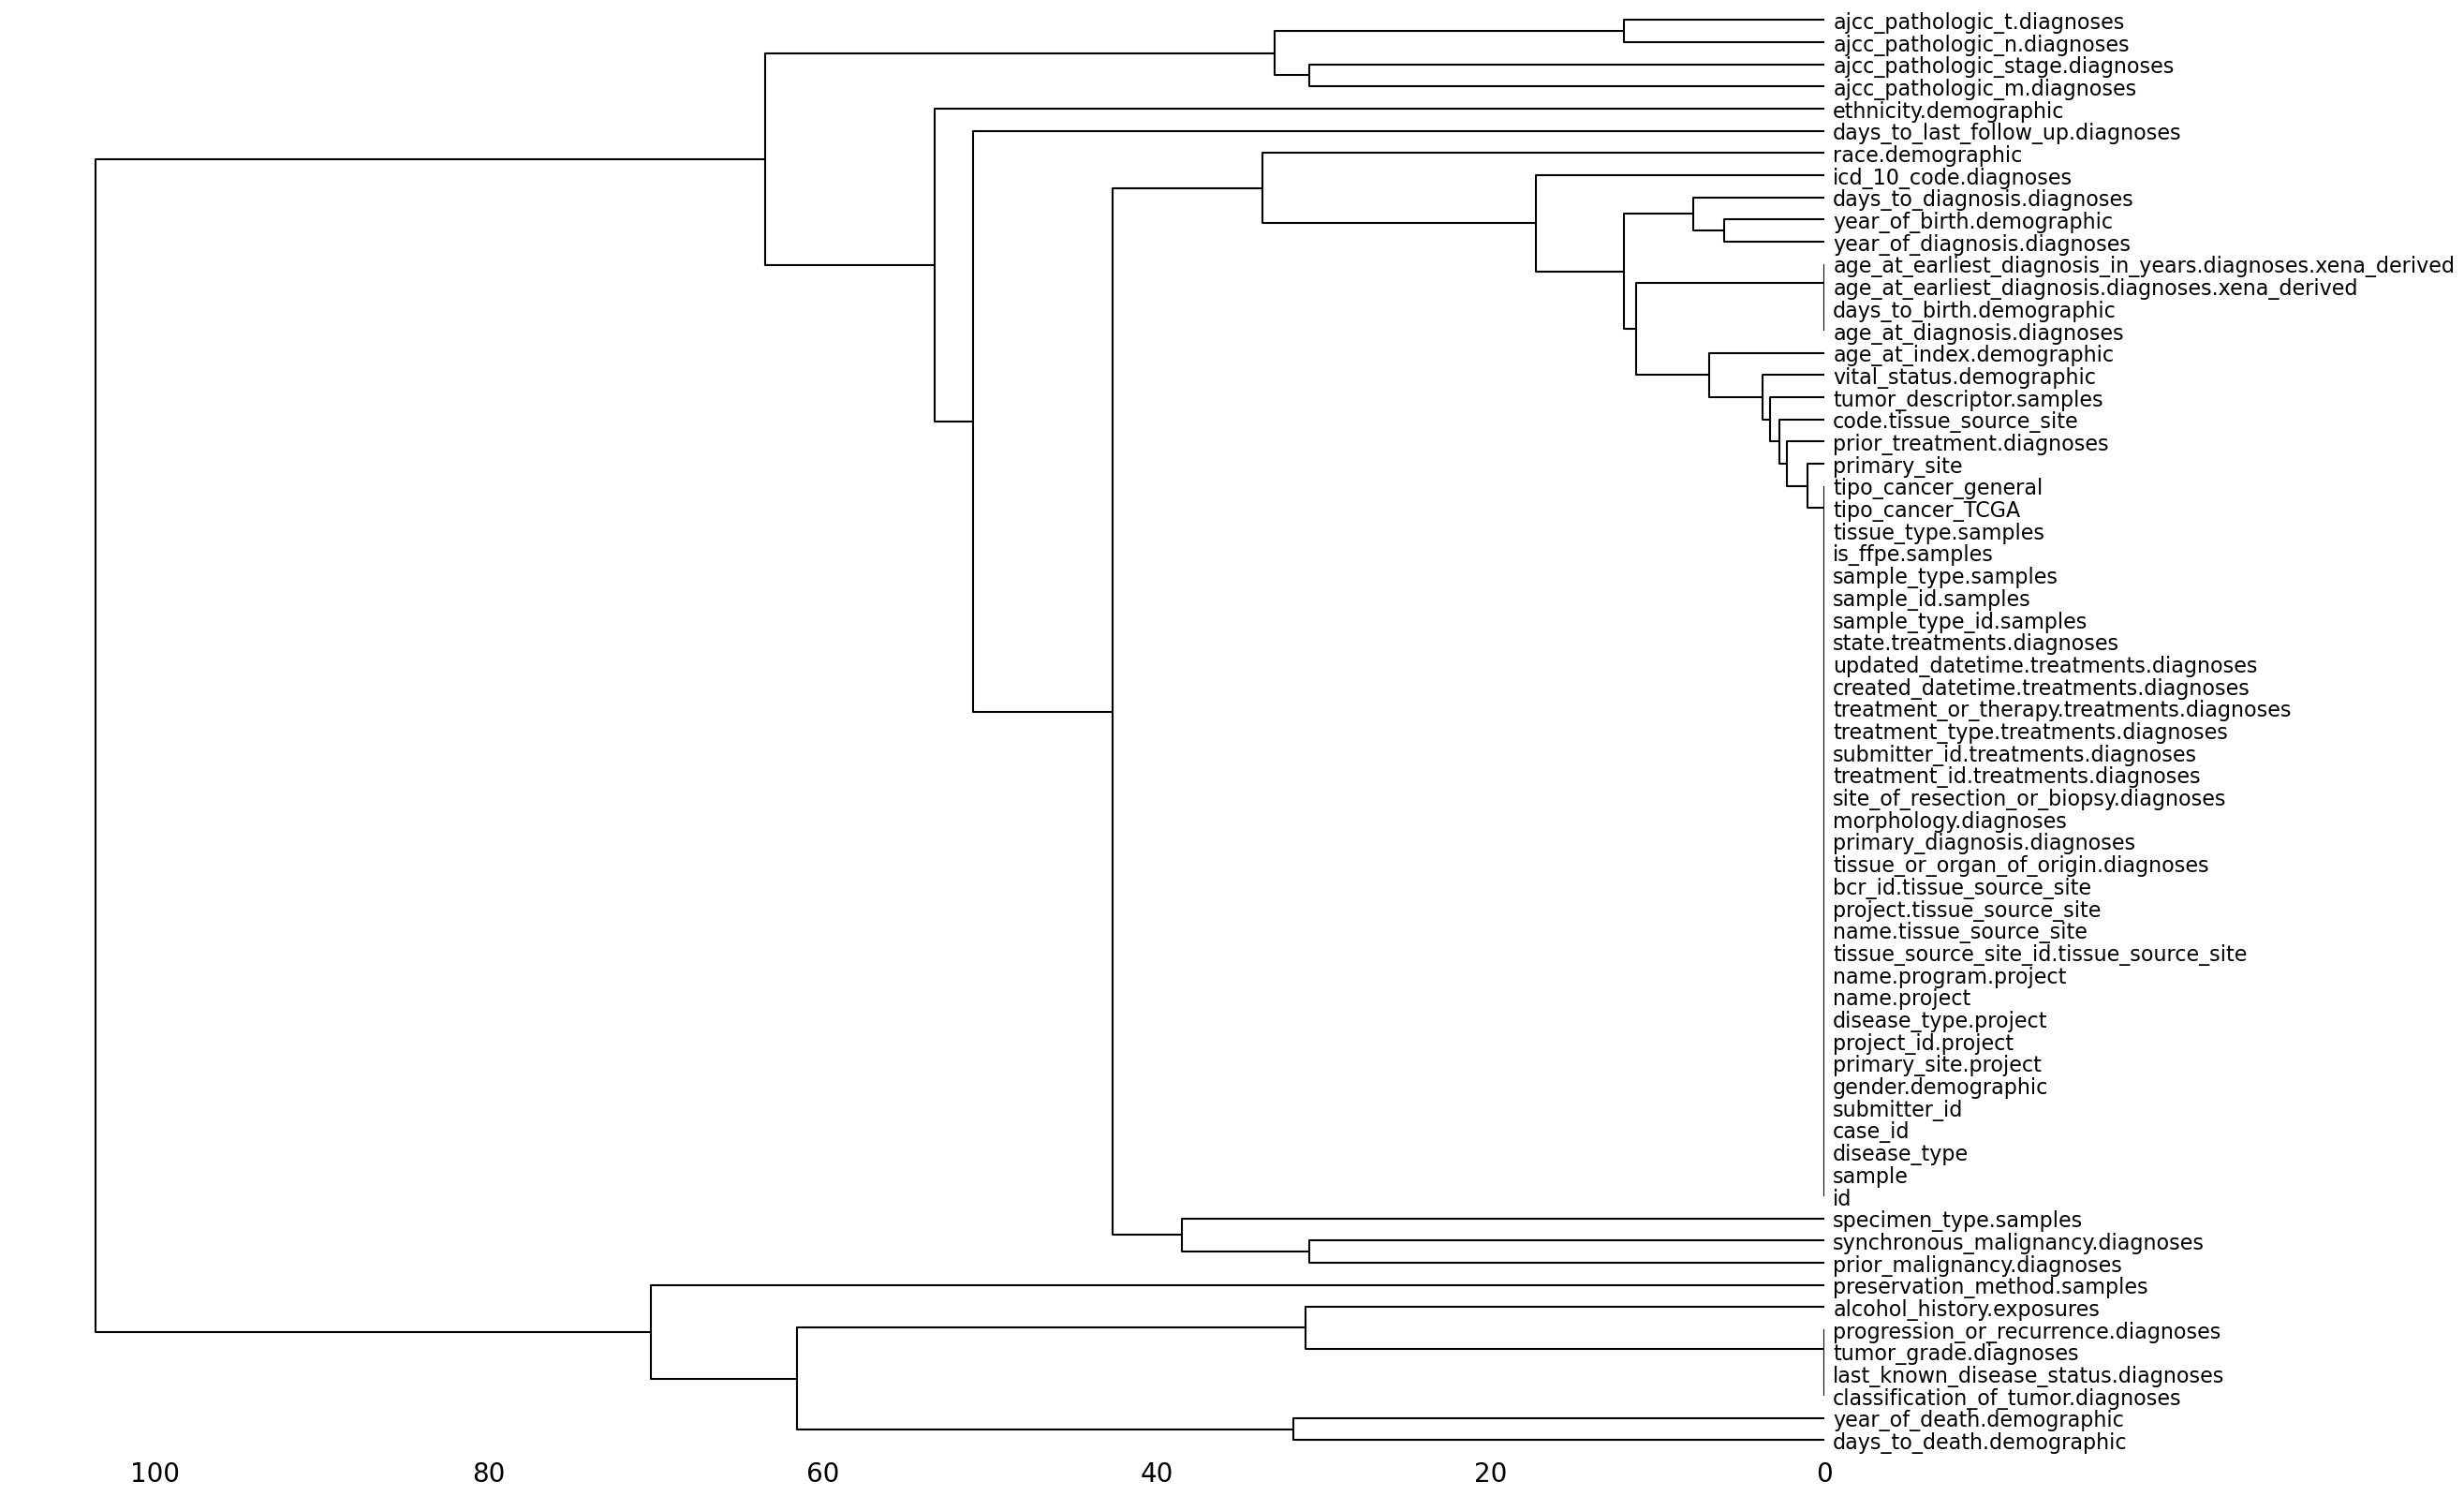

In [55]:
msno.dendrogram(df)

### Análisis por agrupaciones detectadas


##### **GRUPO 1: Variables de supervivencia y seguimiento**
**Columnas:**  
`year_of_death.demographic`, `days_to_death.demographic`, `ajcc_pathologic_t`, `ajcc_pathologic_n`, `ajcc_pathologic_stage`, `ajcc_pathologic_m`, `days_to_last_follow_up.diagnoses`

Estas columnas forman un **bloque clínico** relacionado con seguimiento y estadificación del cáncer.  
Hipótesis: pueden estar ausentes porque **no hay tumor** o **no se realizó la estadificación** (por diagnóstico reciente, falta de biopsia, etc.).

👉 Podrían codificarse como `"no aplica"` si el tipo de cáncer no requiere estadificación.

##### **GRUPO 2: Edad y diagnóstico**
**Columnas:**  
`year_of_diagnosis`, `year_of_birth`, `age_at_diagnosis`, `days_to_birth`, `age_at_earliest_diagnosis`, etc.

Este grupo contiene variables **altamente correlacionadas** y con **muy pocos nulos**.  
Son variables **derivables entre sí** (por ejemplo: `year_of_diagnosis - year_of_birth = age_at_diagnosis`).

##### **GRUPO 3: Muestra y tipo de cáncer**
**Columnas:**  
`tipo_cancer_general`, `tipo_cancer_TCGA`, `sample_type`, `specimen_type`, `tissue_type`, etc.

Estas variables describen el **tipo de cáncer** y las **características de la muestra**. Aparecen **completas o casi completas**.

##### **GRUPO 4: Tratamientos y progresión**
**Columnas:**  
`treatment_id`, `treatment_type`, `updated_datetime`, `progression_or_recurrence`, `tumor_grade`, `classification_of_tumor`, etc.

Este bloque refleja **variables clínicas asociadas a tratamientos y evolución**.  
Faltan juntas posiblemente porque el paciente **no recibió tratamiento** o **aún no se ha registrado**.

##### **GRUPO 5: Diagnóstico previo, metástasis y datos históricos**
**Columnas:**  
`prior_treatment`, `prior_malignancy`, `synchronous_malignancy`, etc.

---

Valores nulos por columnas, gráfico de barras y texto:

tumor_grade.diagnoses                                        12797
classification_of_tumor.diagnoses                            12797
last_known_disease_status.diagnoses                          12797
progression_or_recurrence.diagnoses                          12797
alcohol_history.exposures                                    11833
year_of_death.demographic                                     9536
days_to_death.demographic                                     8526
preservation_method.samples                                   8369
ajcc_pathologic_stage.diagnoses                               4536
ajcc_pathologic_m.diagnoses                                   4536
ajcc_pathologic_n.diagnoses                                   3541
ajcc_pathologic_t.diagnoses                                   3479
ethnicity.demographic                                         2782
days_to_last_follow_up.diagnoses                              2515
synchronous_malignancy.diagnoses                              

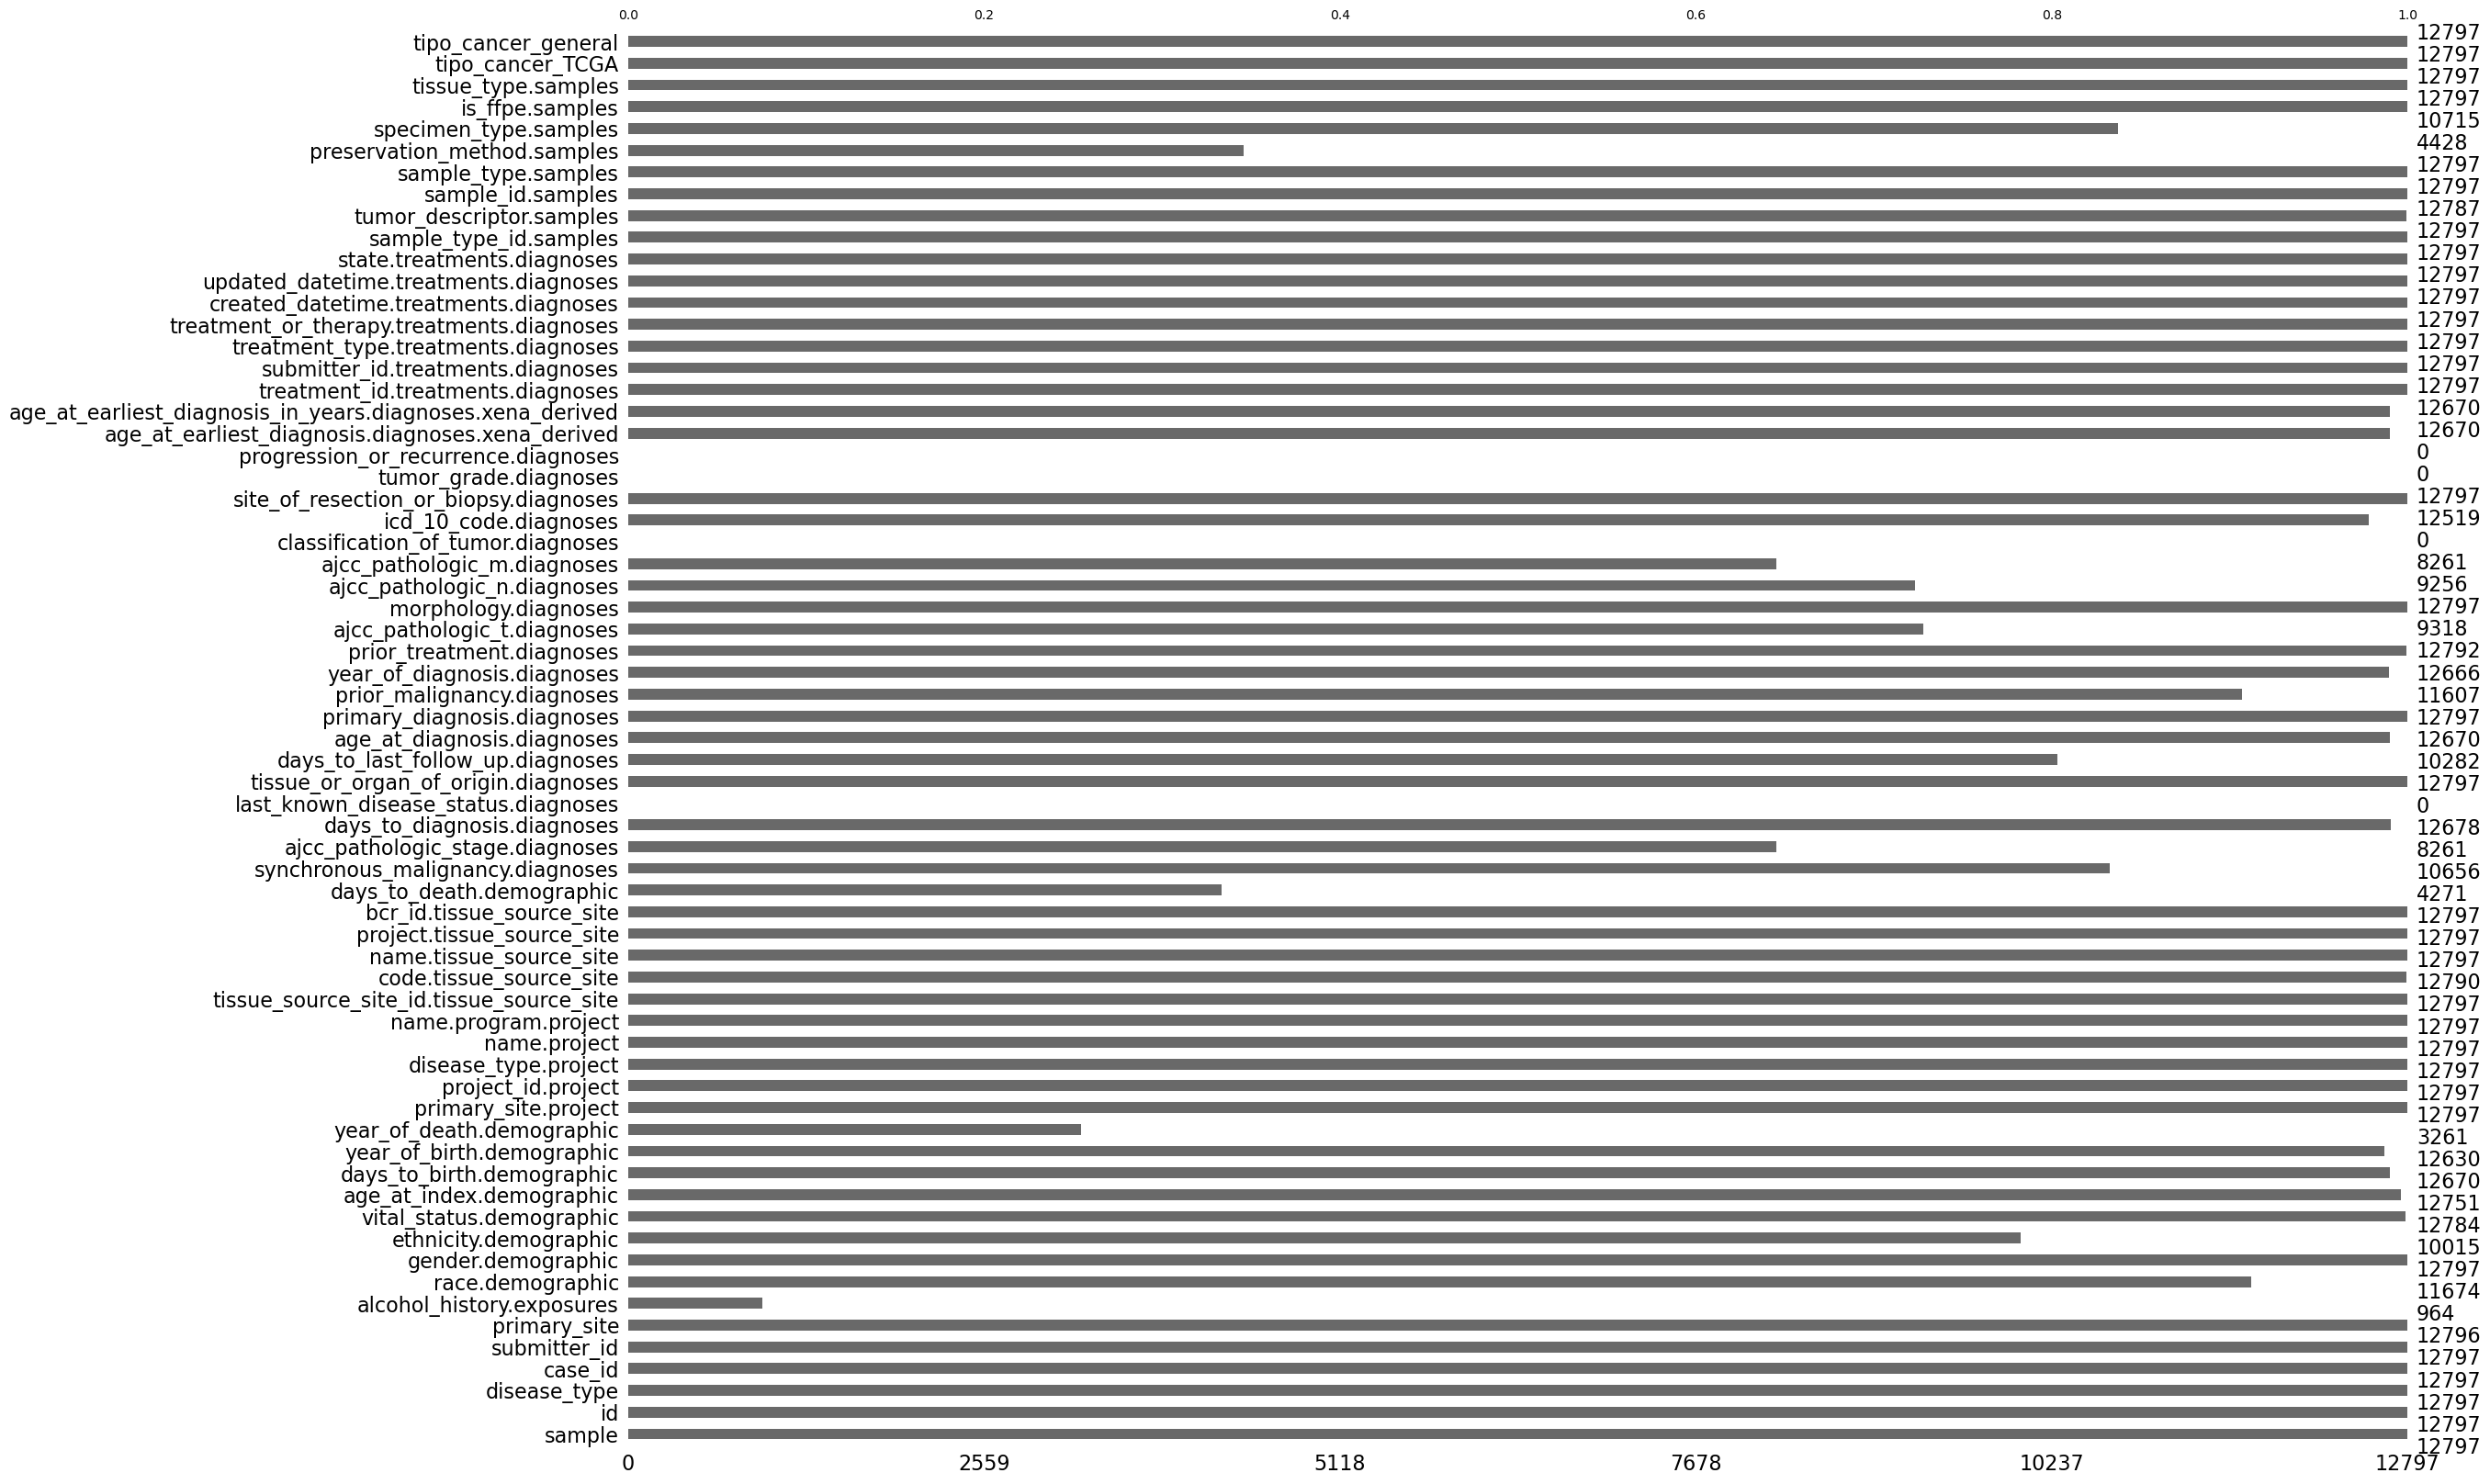

In [56]:
msno.bar(df)
df.isnull().sum().sort_values(ascending=False).head(30)

In [57]:
# Lista de columnas que quieres eliminar
columnas_a_eliminar = [
    'tumor_grade.diagnoses',
    'classification_of_tumor.diagnoses',
    'last_known_disease_status.diagnoses',
    'progression_or_recurrence.diagnoses',
    'alcohol_history.exposures',
    'preservation_method.samples',
    'ajcc_pathologic_stage.diagnoses',
    'ajcc_pathologic_m.diagnoses',
    'ajcc_pathologic_n.diagnoses',
    'ajcc_pathologic_t.diagnoses',
    'ethnicity.demographic',
    'days_to_last_follow_up.diagnoses',
    'synchronous_malignancy.diagnoses',
    'specimen_type.samples',
    'prior_malignancy.diagnoses',
    'race.demographic',
    'icd_10_code.diagnoses',
    'age_at_earliest_diagnosis.diagnoses.xena_derived',
    'age_at_earliest_diagnosis_in_years.diagnoses.xena_derived'
]

# Eliminar las columnas
df = df.drop(columns=columnas_a_eliminar)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12797 entries, 0 to 12796
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sample                                     12797 non-null  object 
 1   id                                         12797 non-null  object 
 2   disease_type                               12797 non-null  object 
 3   case_id                                    12797 non-null  object 
 4   submitter_id                               12797 non-null  object 
 5   primary_site                               12796 non-null  object 
 6   gender.demographic                         12797 non-null  object 
 7   vital_status.demographic                   12784 non-null  object 
 8   age_at_index.demographic                   12751 non-null  float64
 9   days_to_birth.demographic                  12670 non-null  float64
 10  year_of_birth.demograp

In [61]:
# Lista de columnas que deben no tener valores nulos
columnas_requeridas = [
    'year_of_birth.demographic',
    'year_of_diagnosis.diagnoses',
    'age_at_diagnosis.diagnoses',
    'days_to_birth.demographic',
    'days_to_diagnosis.diagnoses',
    'age_at_index.demographic',
    'vital_status.demographic',
    'tumor_descriptor.samples',
    'code.tissue_source_site',
    'primary_site',
    'prior_treatment.diagnoses'
]

# Eliminar filas con NaN en cualquiera de esas columnas
df = df.dropna(subset=columnas_requeridas)

df.isnull().sum().sort_values(ascending=False).head(20)

year_of_death.demographic                    9279
days_to_death.demographic                    8299
sample                                          0
treatment_or_therapy.treatments.diagnoses       0
primary_diagnosis.diagnoses                     0
year_of_diagnosis.diagnoses                     0
prior_treatment.diagnoses                       0
morphology.diagnoses                            0
site_of_resection_or_biopsy.diagnoses           0
treatment_id.treatments.diagnoses               0
submitter_id.treatments.diagnoses               0
treatment_type.treatments.diagnoses             0
created_datetime.treatments.diagnoses           0
tissue_or_organ_of_origin.diagnoses             0
updated_datetime.treatments.diagnoses           0
state.treatments.diagnoses                      0
sample_type_id.samples                          0
tumor_descriptor.samples                        0
sample_id.samples                               0
sample_type.samples                             0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12513 entries, 0 to 12796
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sample                                     12513 non-null  object 
 1   id                                         12513 non-null  object 
 2   disease_type                               12513 non-null  object 
 3   case_id                                    12513 non-null  object 
 4   submitter_id                               12513 non-null  object 
 5   primary_site                               12513 non-null  object 
 6   gender.demographic                         12513 non-null  object 
 7   vital_status.demographic                   12513 non-null  object 
 8   age_at_index.demographic                   12513 non-null  float64
 9   days_to_birth.demographic                  12513 non-null  float64
 10  year_of_birth.demographic  

### Gráfico de barras columnas faltantes
- Columnas como `days_to_death.demographic`, `synchronous_malignancy`, `last_known_disease_status` presentan **altos porcentajes de valores faltantes** (>60%).
- Otras columnas como `submitter_id`, `case_id`, `tipo_cancer_TCGA`, etc., están completamente llenas.

---

#### Recomendaciones

- 🔹 **Eliminar columnas con >80% nulos**, si no son relevantes para el análisis o predicción.
- 🔹 **Imputar categóricas con la moda**, como género, raza, etnicidad.
- 🔹 **Imputar numéricas con mediana o regresión**, dependiendo de la distribución.
- 🔹 **Agrupar imputación de columnas correlacionadas** (basado en el dendrograma).
- 🔹 Considerar `days_to_death` como información censurada en modelos de supervivencia (si los vas a usar).
- 🔹 Fusionar o eliminar columnas altamente correlacionadas o derivadas (como duplicados de edad).


In [8]:
df = df.dropna(subset=['days_to_birth.demographic'])

In [9]:
df.isnull().sum().sort_values(ascending=False).head(20)

year_of_death.demographic                                    9431
days_to_death.demographic                                    8429
ajcc_pathologic_m.diagnoses                                  4510
ajcc_pathologic_stage.diagnoses                              4492
ajcc_pathologic_n.diagnoses                                  3522
ajcc_pathologic_t.diagnoses                                  3465
days_to_last_follow_up.diagnoses                             2467
icd_10_code.diagnoses                                         278
year_of_birth.demographic                                     121
year_of_diagnosis.diagnoses                                   120
days_to_diagnosis.diagnoses                                    76
code.tissue_source_site                                         7
classification_of_tumor.diagnoses                               0
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived       0
site_of_resection_or_biopsy.diagnoses                           0
tumor_grad

In [10]:
df = df.drop('icd_10_code.diagnoses', axis=1)

In [11]:
df.isnull().sum().sort_values(ascending=False).head(20)

year_of_death.demographic                                    9431
days_to_death.demographic                                    8429
ajcc_pathologic_m.diagnoses                                  4510
ajcc_pathologic_stage.diagnoses                              4492
ajcc_pathologic_n.diagnoses                                  3522
ajcc_pathologic_t.diagnoses                                  3465
days_to_last_follow_up.diagnoses                             2467
year_of_birth.demographic                                     121
year_of_diagnosis.diagnoses                                   120
days_to_diagnosis.diagnoses                                    76
code.tissue_source_site                                         7
treatment_id.treatments.diagnoses                               0
site_of_resection_or_biopsy.diagnoses                           0
tumor_grade.diagnoses                                           0
classification_of_tumor.diagnoses                               0
morphology

In [13]:
# Lista de columnas que quieres eliminar
columnas_a_eliminar = [
    'ajcc_pathologic_m.diagnoses',
    'ajcc_pathologic_n.diagnoses',
    'ajcc_pathologic_t.diagnoses',
    'code.tissue_source_site',
    'ajcc_pathologic_stage.diagnoses'
]

# Eliminar las columnas
df = df.drop(columns=columnas_a_eliminar)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10098 entries, 0 to 12796
Data columns (total 59 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   sample                                                     10098 non-null  object 
 1   id                                                         10098 non-null  object 
 2   disease_type                                               10098 non-null  object 
 3   case_id                                                    10098 non-null  object 
 4   submitter_id                                               10098 non-null  object 
 5   primary_site                                               10098 non-null  object 
 6   alcohol_history.exposures                                  10098 non-null  object 
 7   race.demographic                                           10098 non-null  object 
 8   gender.demo

In [15]:
df.isnull().sum().sort_values(ascending=False).head(20)

year_of_death.demographic                                    9283
days_to_death.demographic                                    8302
sample                                                          0
treatment_type.treatments.diagnoses                             0
year_of_diagnosis.diagnoses                                     0
prior_treatment.diagnoses                                       0
morphology.diagnoses                                            0
classification_of_tumor.diagnoses                               0
site_of_resection_or_biopsy.diagnoses                           0
tumor_grade.diagnoses                                           0
progression_or_recurrence.diagnoses                             0
age_at_earliest_diagnosis.diagnoses.xena_derived                0
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived       0
treatment_id.treatments.diagnoses                               0
submitter_id.treatments.diagnoses                               0
treatment_

In [16]:
df.to_csv('../Dataframe/mi_dataframe.csv', index=False)

## Tipos de datos y cardinalidad

In [17]:
df.dtypes.value_counts()

object     46
float64    11
int64       1
bool        1
Name: count, dtype: int64

In [18]:
df.dtypes

sample                                                        object
id                                                            object
disease_type                                                  object
case_id                                                       object
submitter_id                                                  object
primary_site                                                  object
alcohol_history.exposures                                     object
race.demographic                                              object
gender.demographic                                            object
ethnicity.demographic                                         object
vital_status.demographic                                      object
age_at_index.demographic                                     float64
days_to_birth.demographic                                    float64
year_of_birth.demographic                                    float64
year_of_death.demographic         

Las columnas tipo object tenemos que convertirlas a categóricas: codificación label encoder o one hot encoder.

In [19]:
df.nunique().sort_values(ascending=False).head(25)

sample                                                       10098
sample_id.samples                                            10098
id                                                            8920
case_id                                                       8920
submitter_id                                                  8920
updated_datetime.treatments.diagnoses                         8920
created_datetime.treatments.diagnoses                         8920
submitter_id.treatments.diagnoses                             8920
treatment_id.treatments.diagnoses                             8920
age_at_earliest_diagnosis_in_years.diagnoses.xena_derived     7047
age_at_earliest_diagnosis.diagnoses.xena_derived              7047
age_at_diagnosis.diagnoses                                    7047
days_to_birth.demographic                                     7047
days_to_last_follow_up.diagnoses                              2768
days_to_death.demographic                                     

In [20]:
n_pacientes = df['case_id'].nunique()
print(f"Número total de pacientes únicos: {n_pacientes}")


Número total de pacientes únicos: 8920


Columnas con cardinalidad máxima (una por fila), son identificadores únicos, no aportan nada al modelo, podemos eliminarlas:
- sample
- sample_id.samples                              
- case_id                                              
- submitter_id                                                       
- submitter_id.treatments.diagnoses                               
- id 

Columnas con muchas categorías, pero útiles:
Fechas o ids de tratamientos, debemos transformarlas:
- updated_datetime.treatments.diagnoses (Fecha): Convertir a `datetime` y luego extraer el año, el mes, o **calcular duración**            
- created_datetime.treatments.diagnoses (Fecha): Igual que la anterior. Se puede comparar ambas para ver **cuánto tiempo tardó** en actualizarse el tratamiento
- treatment_id.treatments.diagnoses (Id): No aporta valor directamente, se puede **contar cuántos tratamientos únicos** tiene un paciente (feature útil)

Variables numéricas continuas, las dejamos igual:
- days_to_birth.demographic                              
- age_at_earliest_diagnosis_in_years.diagnoses.xena_derived  
- age_at_earliest_diagnosis.diagnoses.xena_derived     
- age_at_diagnosis.diagnoses

Todas vienen a decir lo mismo, el centro del que procede la muestra, no sé si nos servirá mucho de estudio...:
- tissue_source_site_id.tissue_source_site 
- code.tissue_source_site
- name.tissue_source_site 

## Estadísticas descriptivas

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sample,10098,10098,TCGA-B0-5695-01A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,10098,8920,86b165c2-d0e6-4a4f-84ed-aa95e3133627,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease_type,10098,26,Adenomas and Adenocarcinomas,4421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_id,10098,8920,86b165c2-d0e6-4a4f-84ed-aa95e3133627,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
submitter_id,10098,8920,TCGA-92-7340,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_site,10098,50,Breast,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcohol_history.exposures,10098,3,Not Reported,9463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race.demographic,10098,6,white,7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender.demographic,10098,2,female,5352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity.demographic,10098,3,not hispanic or latino,7591,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribución de variables numéricas

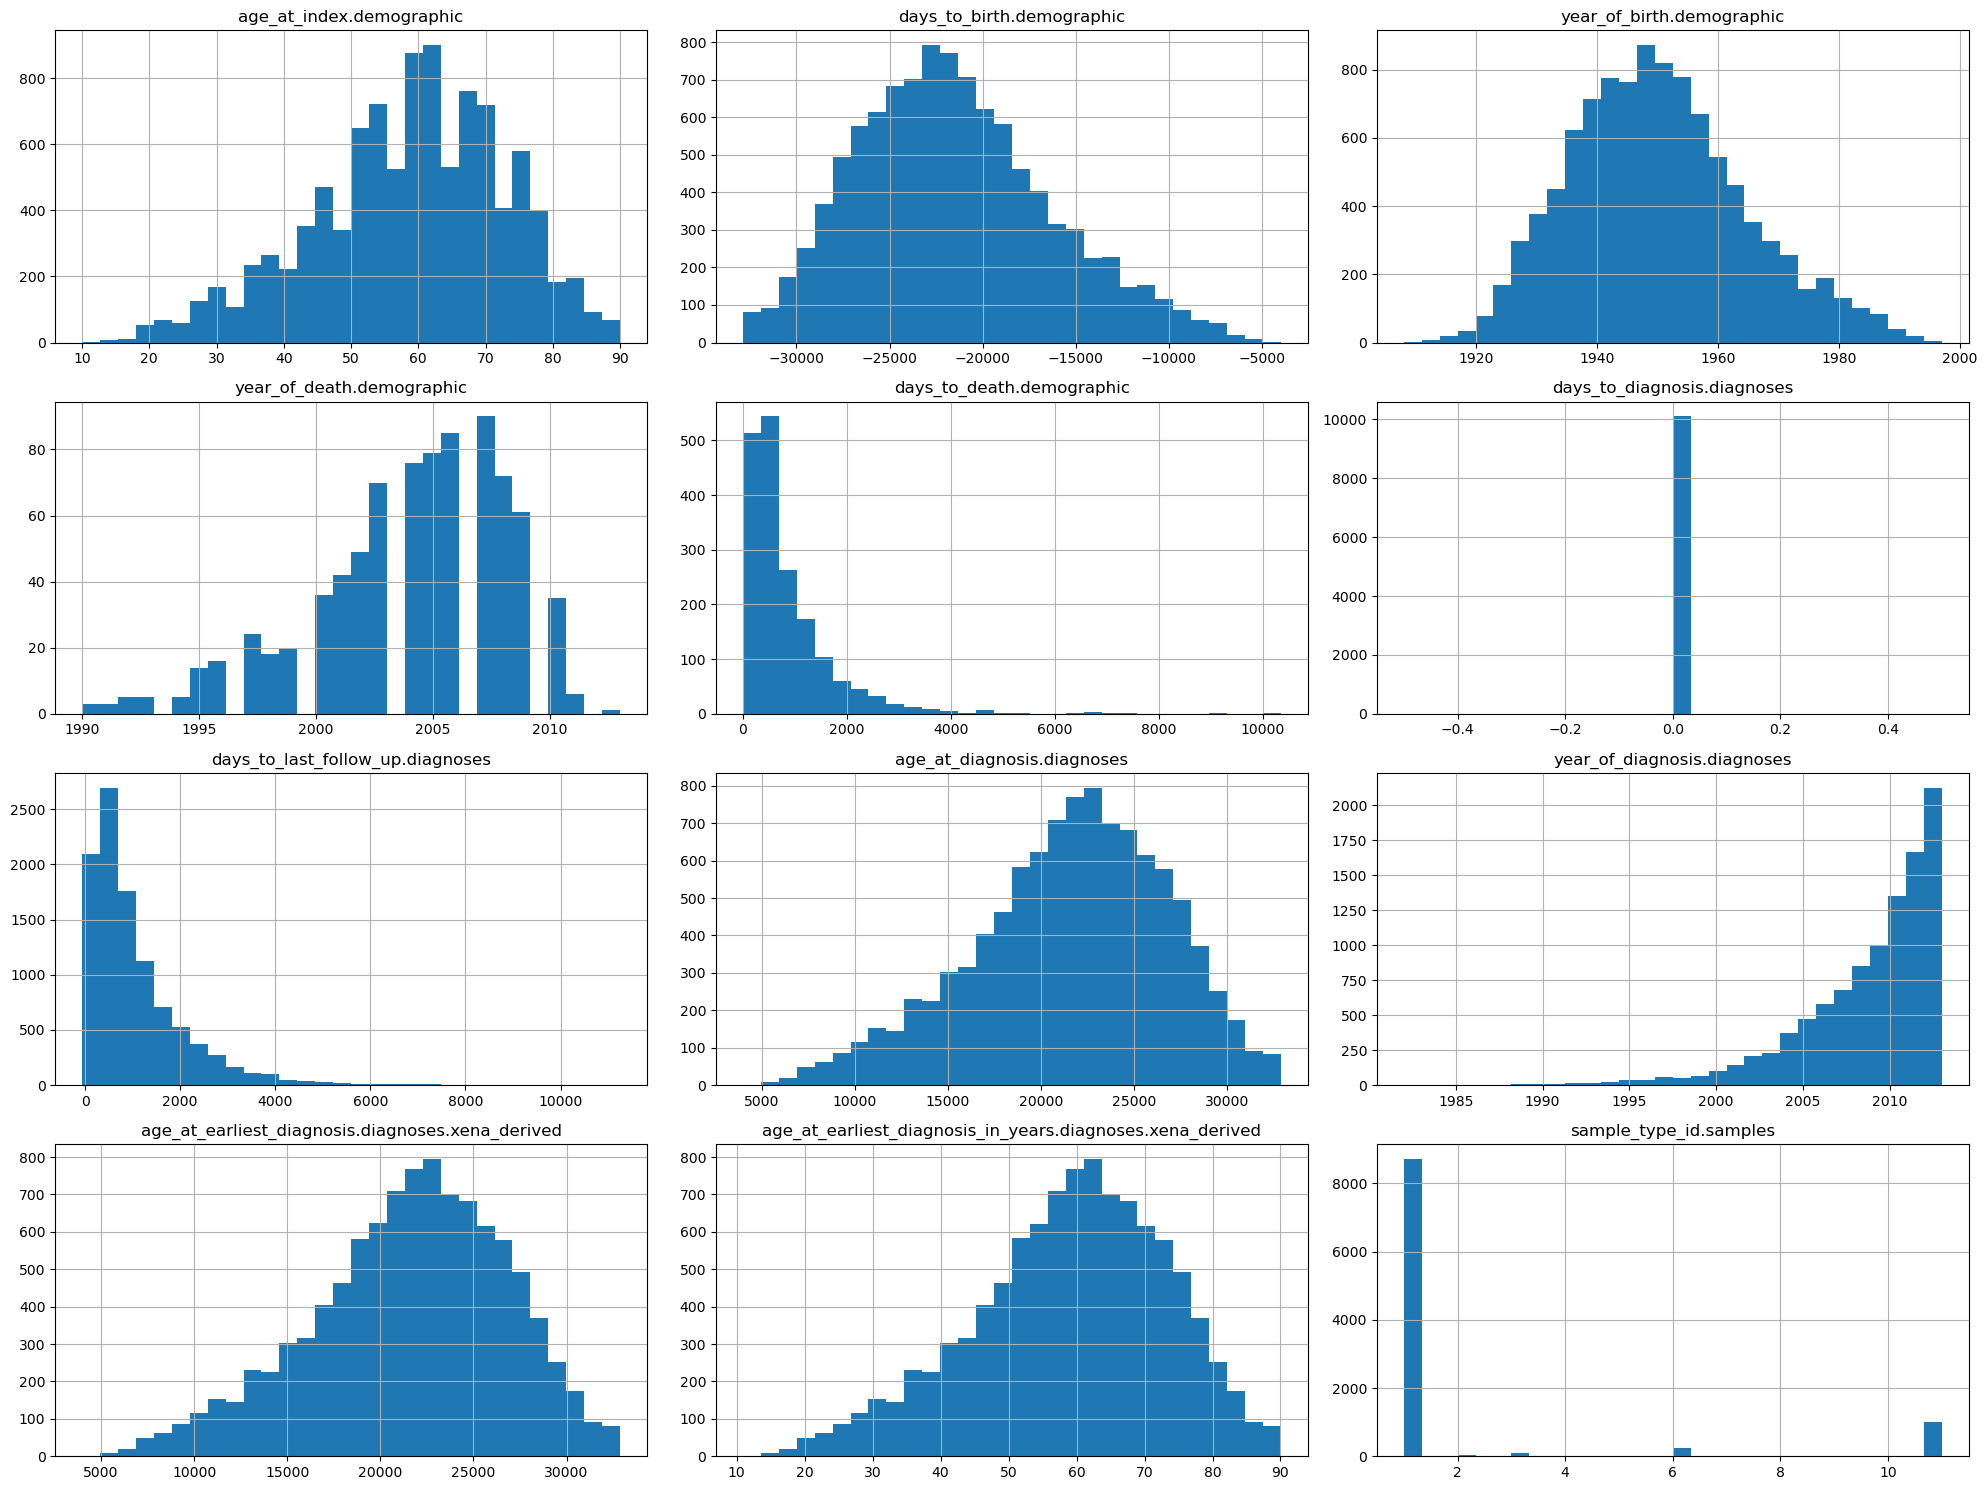

In [22]:
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

## Boxplots para detección de outliers

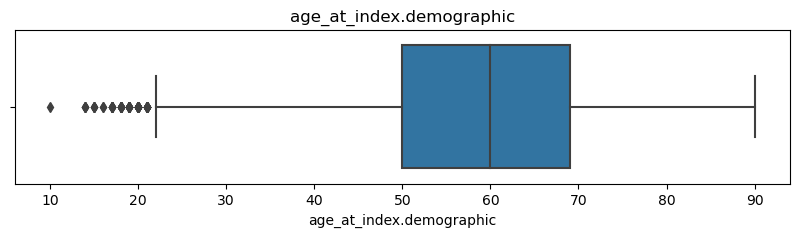

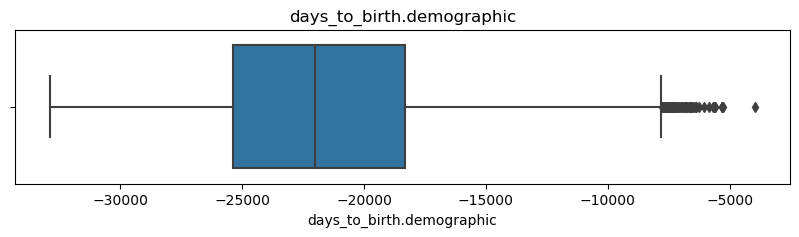

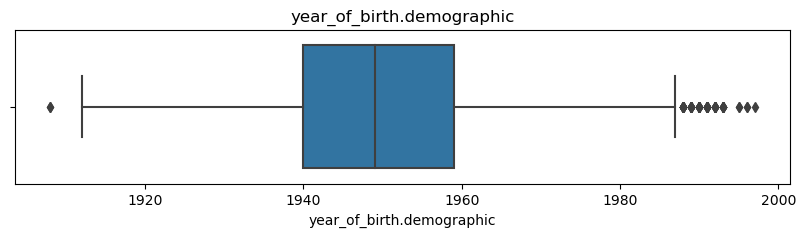

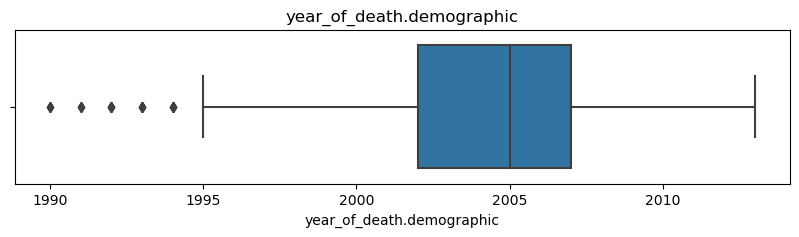

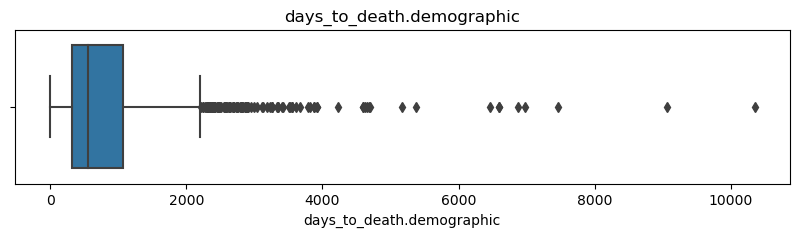

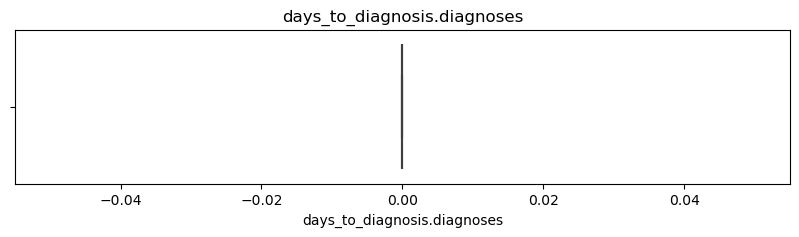

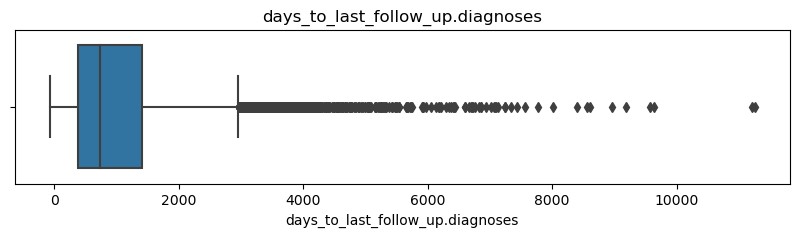

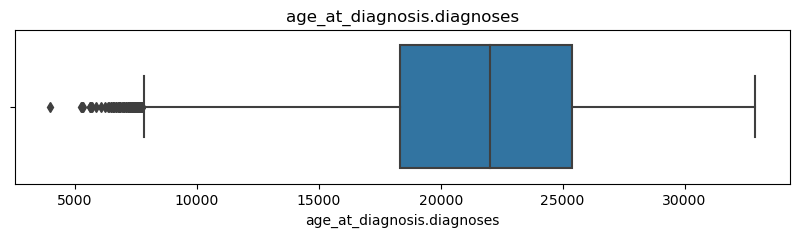

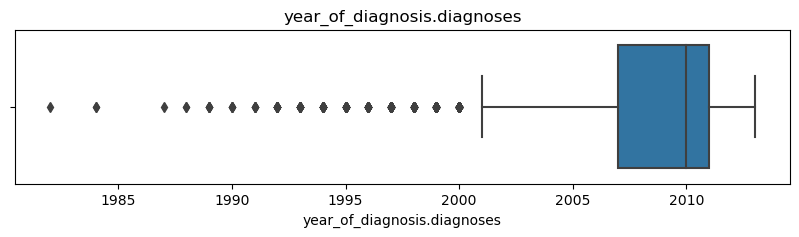

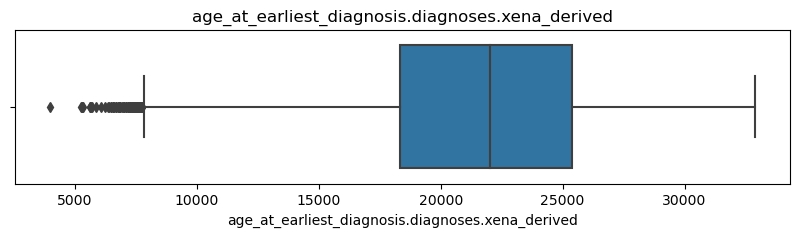

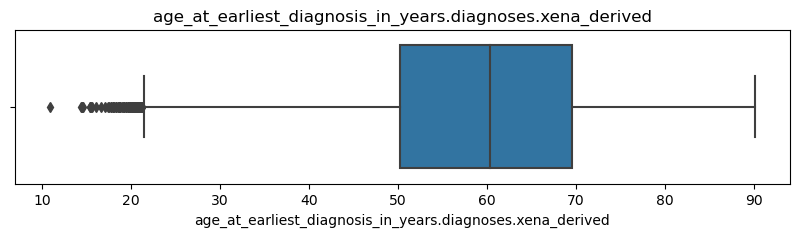

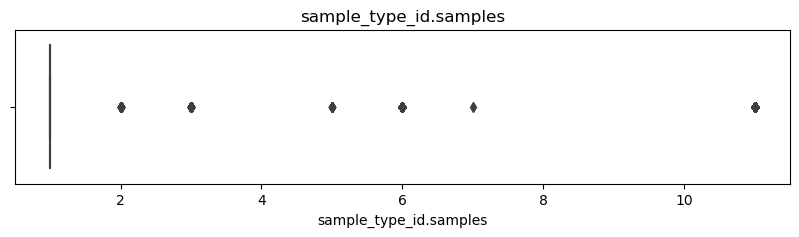

In [23]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Frecuencias de variables categóricas

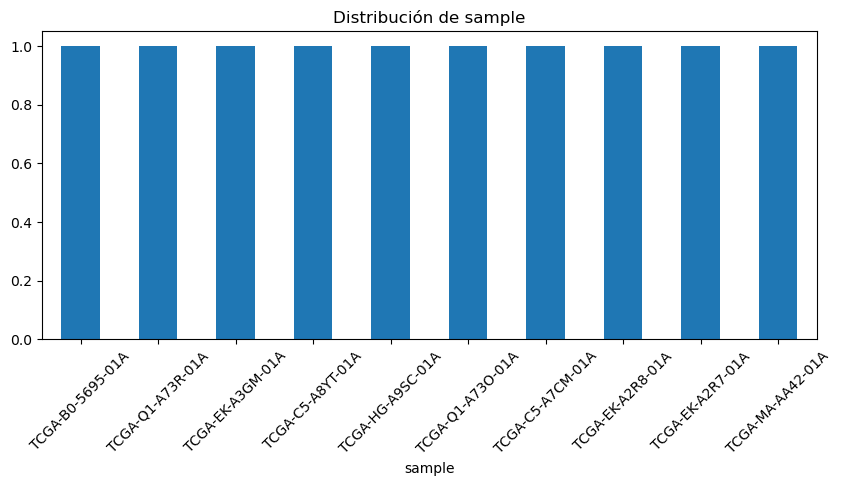

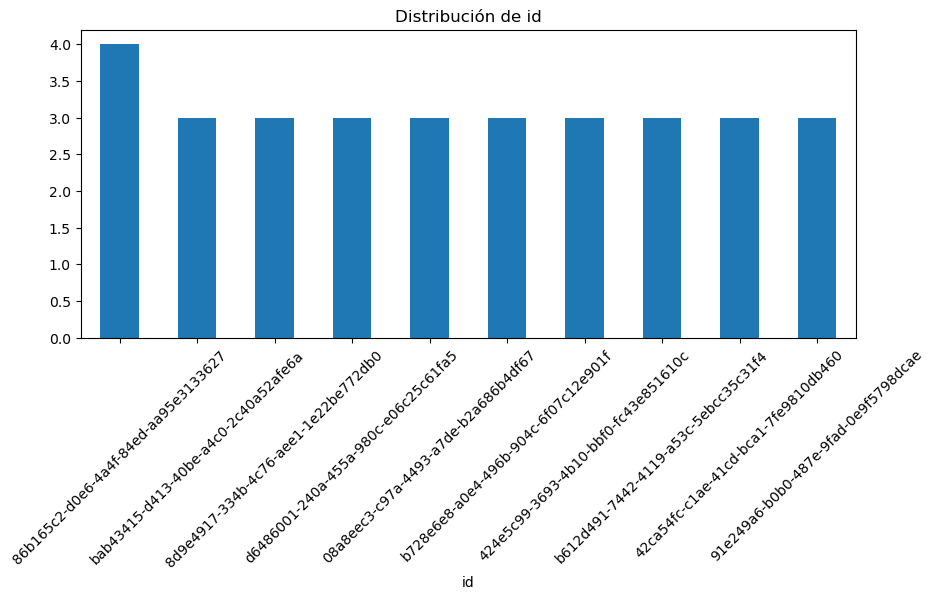

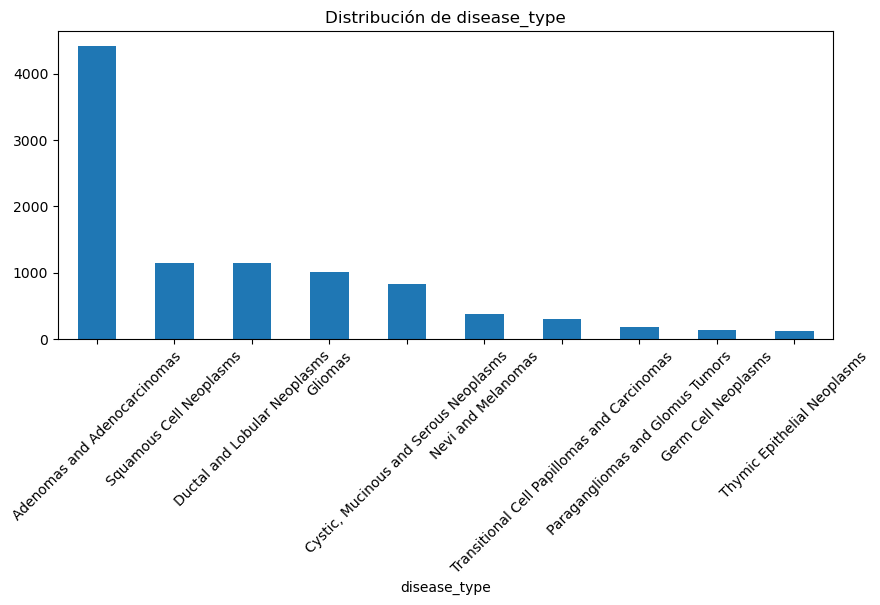

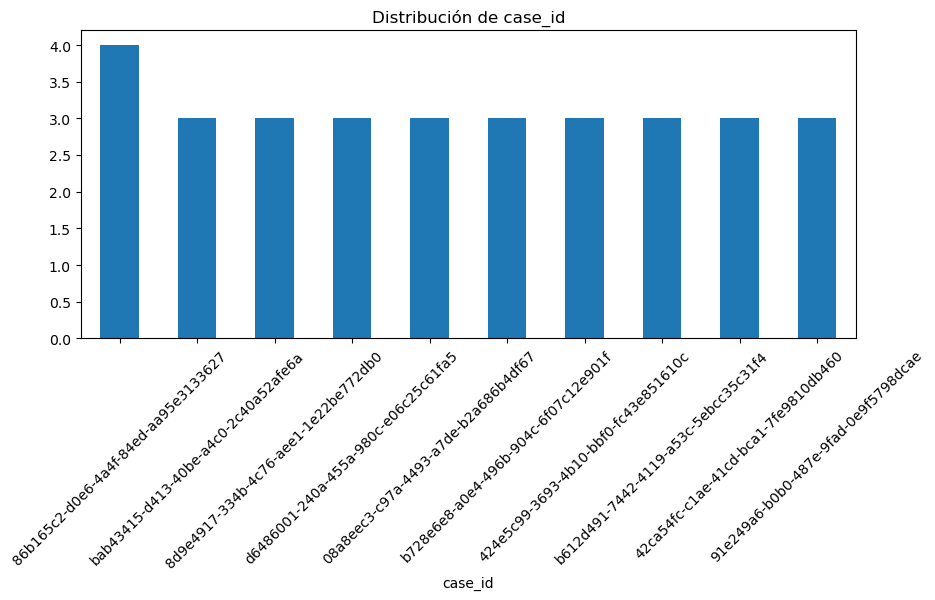

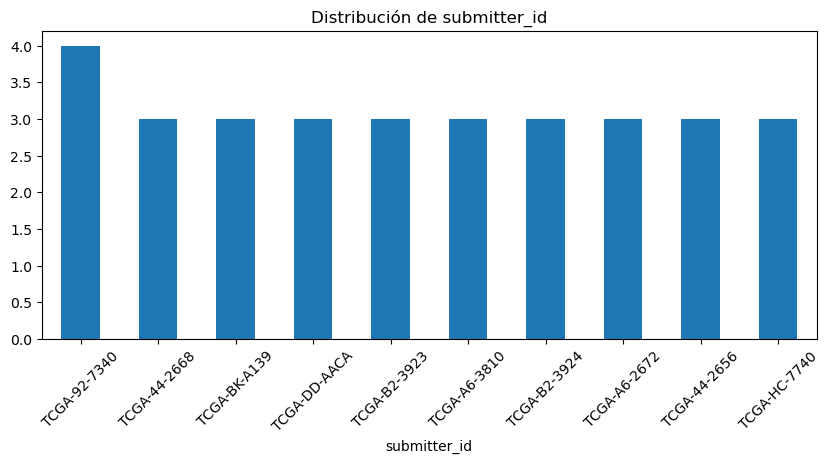

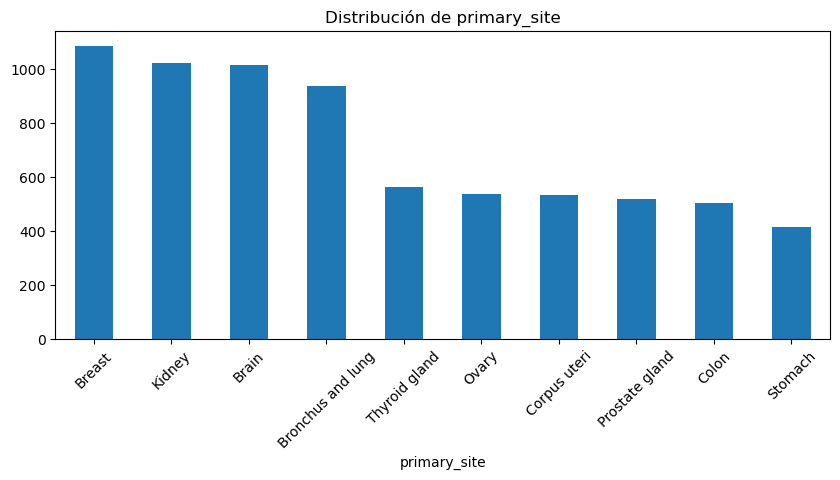

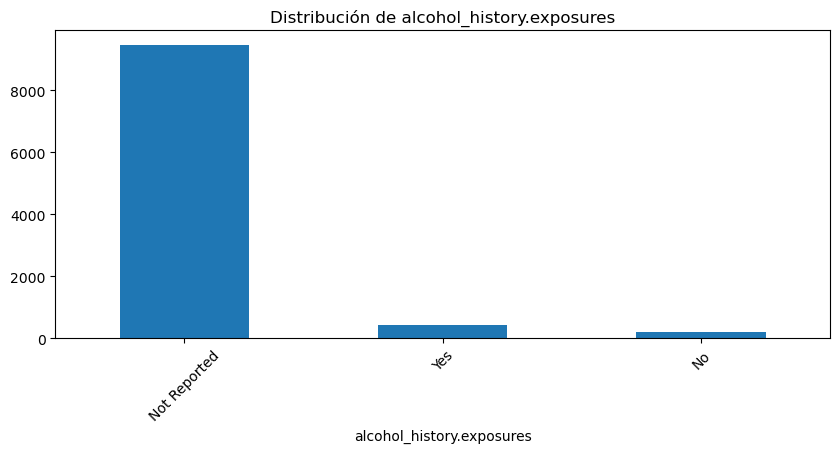

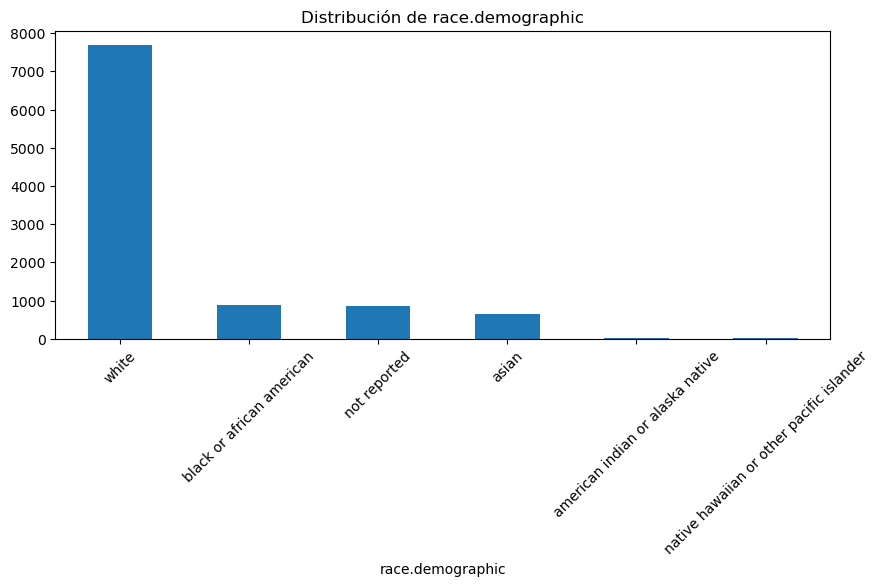

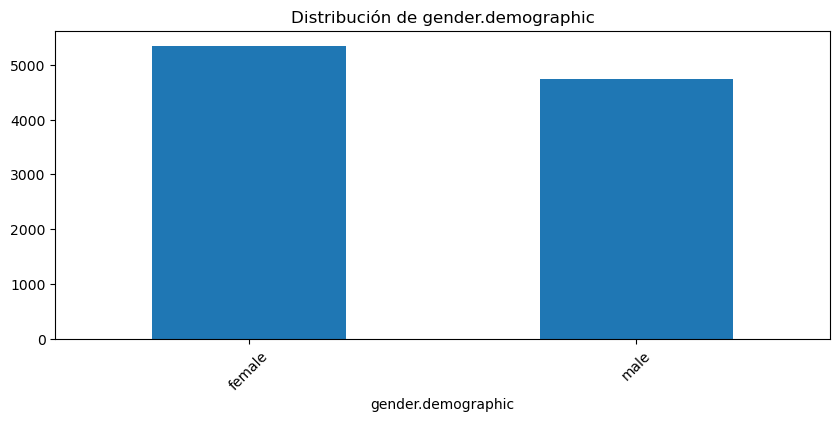

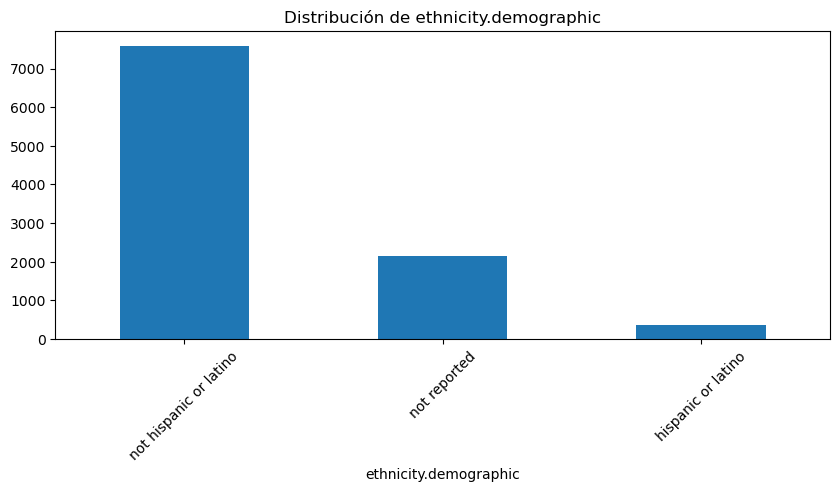

In [24]:
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns[:10]:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

## Correlación entre variables numéricas

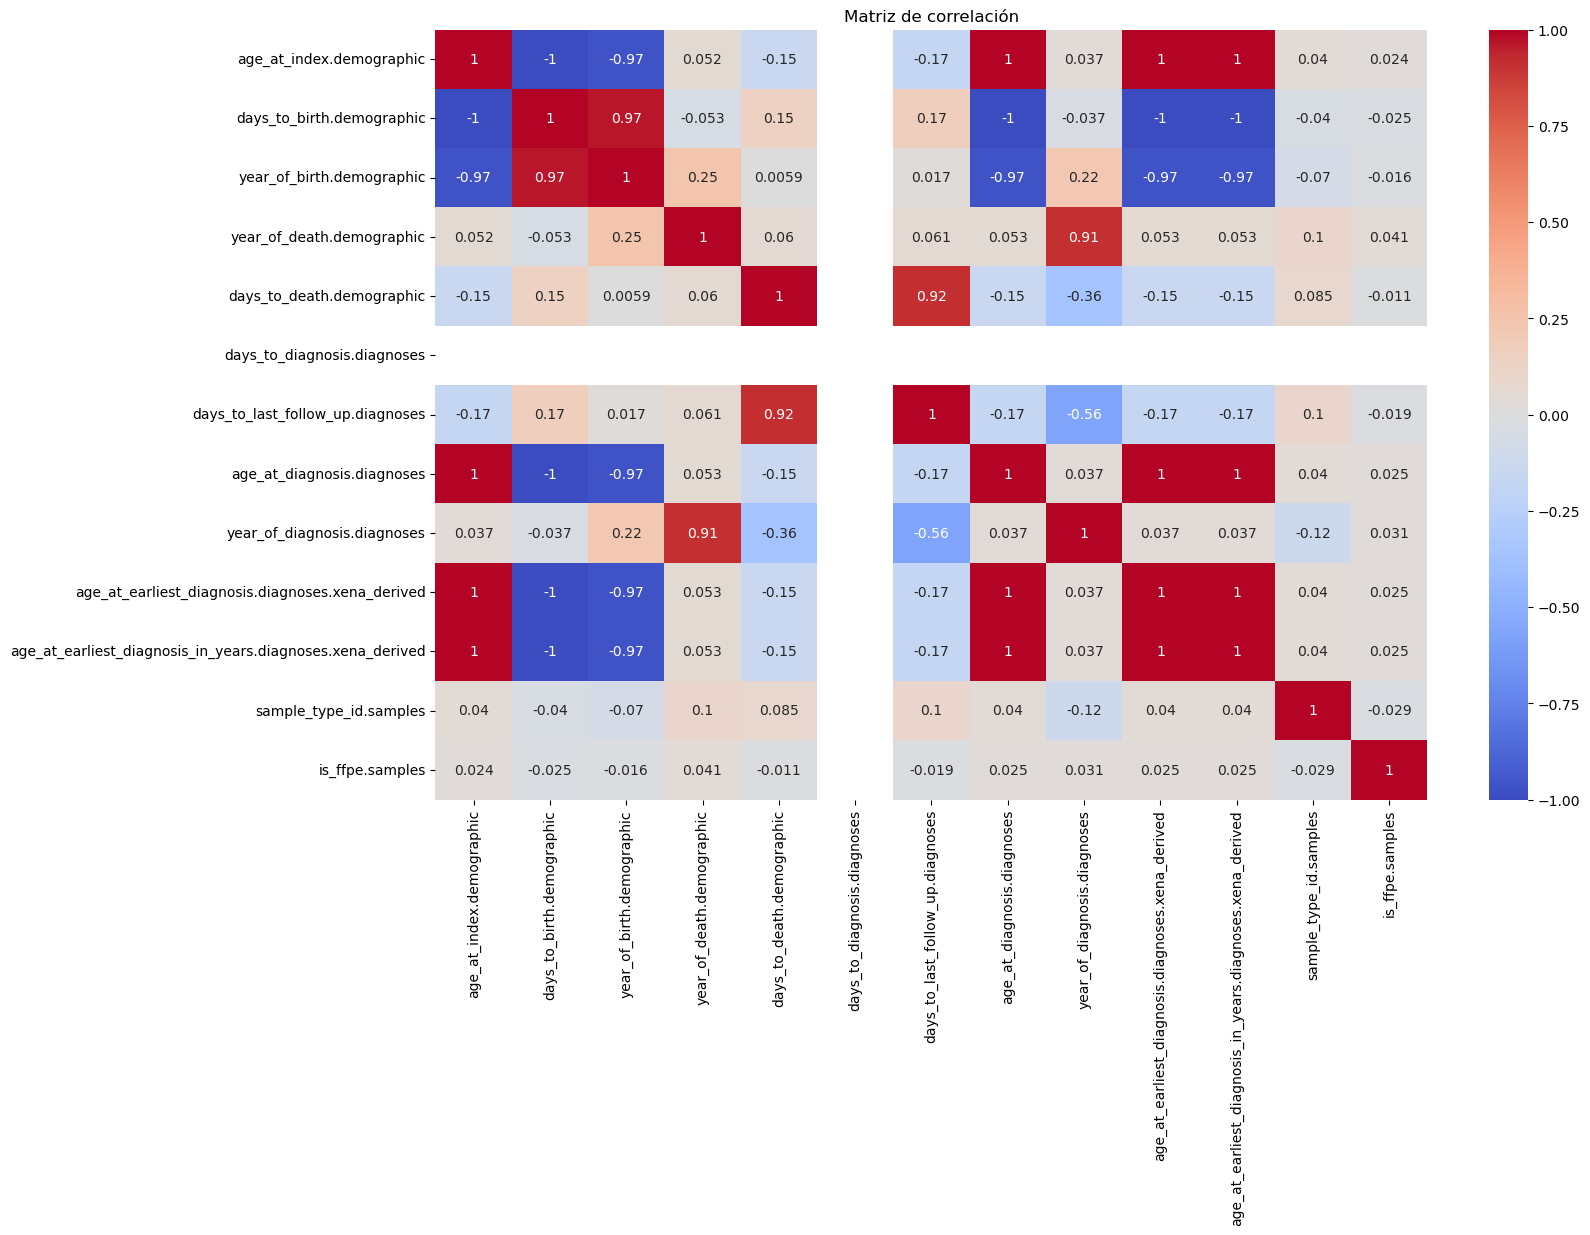

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()

## Relación entre variables categóricas y el tipo de cáncer

In [26]:
target = 'tipo_cancer_general'
for col in categoricas.columns[:10]:
    if col != target:
        cruzada = pd.crosstab(df[col], df[target])
        cruzada.plot(kind='bar', stacked=True, figsize=(10,4))
        plt.title(f'Relación entre {col} y {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

KeyboardInterrupt: 